In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [5]:
import pandas as pd

# Read CSV file
csv_file_path = "Hospitalisation details.csv"
df1 = pd.read_csv(csv_file_path)

csv_file_path = "Medical Examinations.csv"
df2 = pd.read_csv(csv_file_path)

# Read Excel file
excel_file_path = "Names.xlsx"
df3 = pd.read_excel(excel_file_path)

In [6]:
# Merge df1 and df2 based on 'Customer ID'
df4 = pd.merge(df1, df2, on='Customer ID', how='inner')

# Save df4 to a CSV file
df4.to_csv("df4.csv", index=False)

# Merge df4 and df3 based on 'Customer ID'
df5 = pd.merge(df4, df3, on='Customer ID', how='inner')

# Save df5 to a CSV file
df5.to_csv("df5.csv", index=False)

In [8]:
# Calculate the missing value percentage for each column
missing_percentage = (df5.isnull().sum() / len(df5)) * 100

# Create a DataFrame to display the missing value percentage
missing_df = pd.DataFrame({'Column': df5.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print("Missing Value Percentage:")
print(missing_df)

Missing Value Percentage:
                                        Column  Missing Percentage
Customer ID                        Customer ID                 0.0
year                                      year                 0.0
month                                    month                 0.0
date                                      date                 0.0
children                              children                 0.0
charges                                charges                 0.0
Hospital tier                    Hospital tier                 0.0
City tier                            City tier                 0.0
State ID                              State ID                 0.0
BMI                                        BMI                 0.0
HBA1C                                    HBA1C                 0.0
Heart Issues                      Heart Issues                 0.0
Any Transplants                Any Transplants                 0.0
Cancer history                  Canc

In [9]:
df5.shape

(2335, 17)

In [11]:
# Find rows with trivial values (e.g., "?")
trivial_rows = df5[df5.apply(lambda row: row.astype(str).str.contains('\?', regex=False).any(), axis=1)]

# Calculate the percentage of rows with trivial values
percentage_trivial = (len(trivial_rows) / len(df5)) * 100

print("Percentage of rows with trivial values:", percentage_trivial)

# Delete rows with trivial values if they do not contain significant information
# For example, if you want to keep rows where trivial values are only in specific columns:
columns_to_check = ['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name']  # Add the column names where you want to check for trivial values

significant_rows = df5[~df5[columns_to_check].apply(lambda row: row.astype(str).str.contains('\?', regex=False).any(), axis=1)]

# Or if you want to remove rows with trivial values in any column:
significant_rows = df5[~df5.apply(lambda row: row.astype(str).str.contains('\?', regex=False).any(), axis=1)]

Percentage of rows with trivial values: 0.0


In [21]:
# Replace 'no major Surgerie' with 0
df5['NumberOfMajorSurgeries'] = df5['NumberOfMajorSurgeries'].replace('No major surgery', '0')

# Convert the column to numeric data type
df5['NumberOfMajorSurgeries'] = pd.to_numeric(df5['NumberOfMajorSurgeries'])

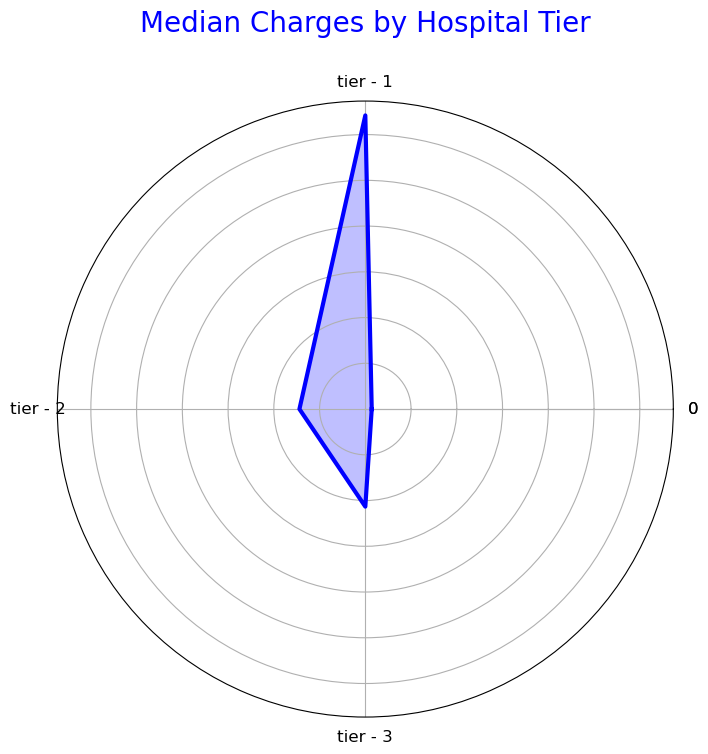

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate median charges for each Hospital tier
median_charges = df5.groupby('Hospital tier')['charges'].median()

# Number of tiers
num_tiers = len(median_charges)
angles = np.linspace(0, 2 * np.pi, num_tiers, endpoint=False).tolist()

# The radar chart is circular, so we need to "complete the loop" and append the start value to the end.
median_charges = pd.concat([median_charges, pd.Series(median_charges.iloc[0])])

# Adjust angles to have the same number of elements as median_charges
angles += [angles[0]]
# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, median_charges.values, color='blue', alpha=0.25)
ax.plot(angles, median_charges.values, color='blue', linewidth=3)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(median_charges.index.tolist(), fontsize=12)

plt.title('Median Charges by Hospital Tier', size=20, color='blue', y=1.1)
plt.show()

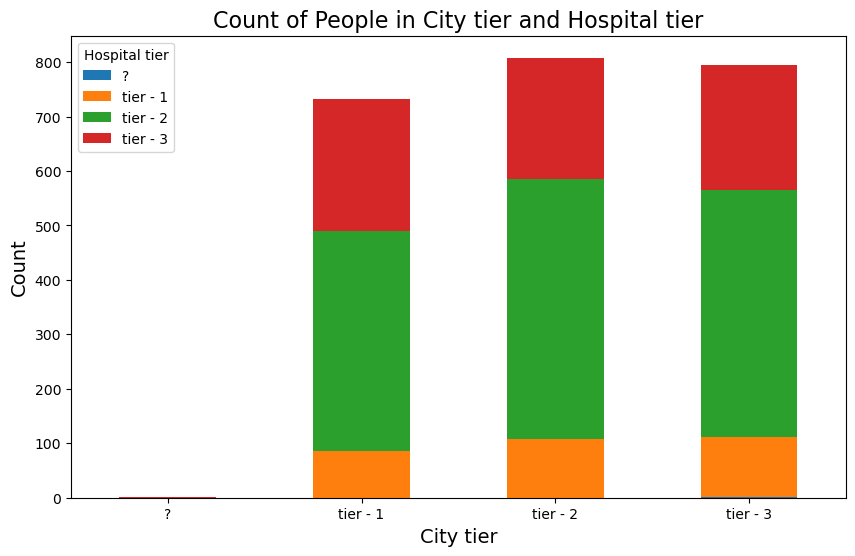

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a frequency table
frequency_table = pd.crosstab(df5['City tier'], df5['Hospital tier'])

# Plotting a stacked bar chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Count of People in City tier and Hospital tier', fontsize=16)
plt.xlabel('City tier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Hospital tier')

plt.show()


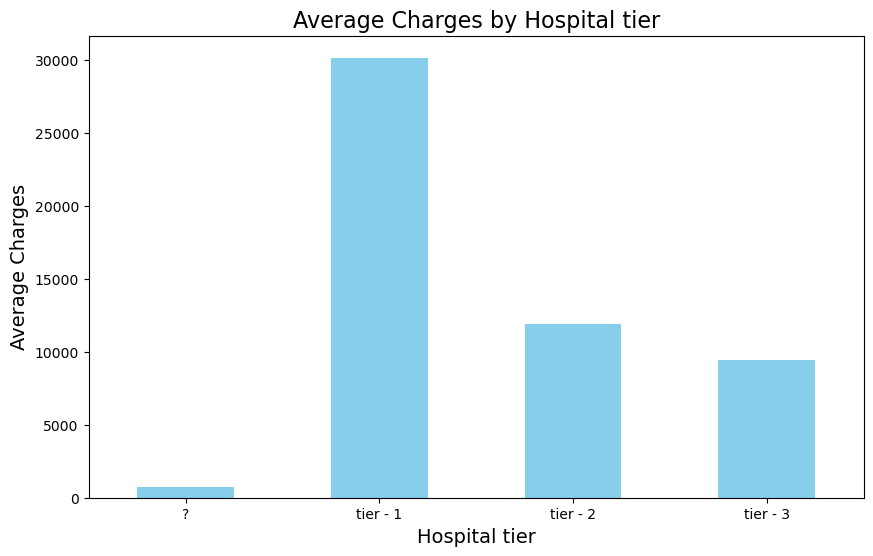

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'City tier' and calculating the average 'charges'
average_charges = df5.groupby('Hospital tier')['charges'].mean()

# Plotting the bar plot
average_charges.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels and title
plt.title('Average Charges by Hospital tier', fontsize=16)
plt.xlabel('Hospital tier', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)

plt.show()


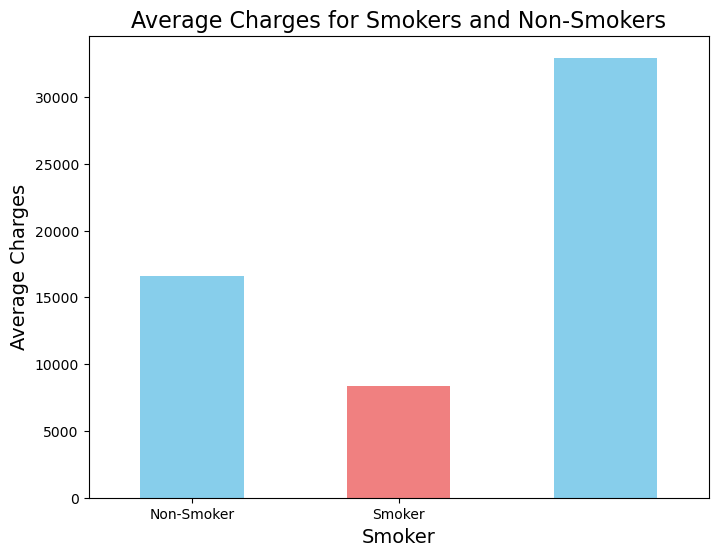

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'smoker' and calculating the average 'charges'
average_charges_smoker = df5.groupby('smoker')['charges'].mean()

# Plotting the bar plot
average_charges_smoker.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title('Average Charges for Smokers and Non-Smokers', fontsize=16)
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])

plt.show()


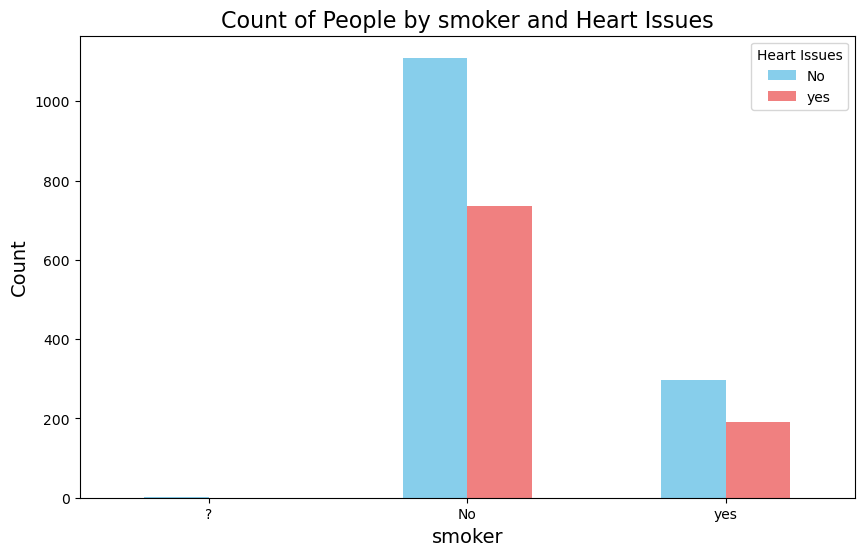

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# Assuming df5 is your DataFrame containing the data
# df5 = ...

# Grouping by 'smoker' and 'Heart Issues' and calculating the counts
grouped_counts = df5.groupby(['smoker', 'Heart Issues']).size().unstack()

# Plotting the grouped bar plot
grouped_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title('Count of People by smoker and Heart Issues', fontsize=16)
plt.xlabel('smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Heart Issues')

plt.show()


In [35]:
# Define the column names for df5
nominal_columns = ['Hospital tier', 'City tier', 'Heart Issues',
                   'Any Transplants', 'Cancer history', 'smoker',]
ordinal_columns = ['children', 'year', 'month', 'NumberOfMajorSurgeries']

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for nominal variables
one_hot_encoded = pd.get_dummies(df5[nominal_columns], drop_first=True, prefix_sep='_')

# Ordinal Encoding for ordinal variables (optional)
# You can directly use ordinal variables without encoding if they are already in ordinal format
# Or use LabelEncoder to convert them to ordinal format
label_encoder = LabelEncoder()
for col in ordinal_columns:
    df5[col] = label_encoder.fit_transform(df5[col])


In [39]:
# Create one-hot encoding for specific states
one_hot_states = pd.get_dummies(df5['State ID'].apply(str))[['R1011', 'R1012', 'R1013']]

# Concatenate one-hot encoded columns with the original DataFrame
df5_encoded = pd.concat([df5, one_hot_states], axis=1)

In [41]:
df6 = pd.concat([df5_encoded, one_hot_encoded], axis=1)

In [43]:
df6.shape

(2335, 31)

In [45]:
# Permanently delete specified columns from df6
df6.drop(columns=['smoker', 'Cancer history', 'Any Transplants', 'Heart Issues',
                  'City tier', 'Hospital tier', 'State ID'], inplace=True)

# Print the DataFrame after deletion
print("DataFrame df6 after deletion:")
df6.shape

DataFrame df6 after deletion:


(2335, 24)

In [47]:
# Define columns to replace True/False
columns_to_replace = ['R1011', 'R1012', 'R1013',
                      'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                      'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                      'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                      'smoker_No', 'smoker_yes']

# Replace True with 1 and False with 0 for the specified columns
df6[columns_to_replace] = df6[columns_to_replace].replace({True: 1, False: 0})

In [49]:
# Get current year, month, and day
current_year = pd.to_datetime('today').year
current_month = pd.to_datetime('today').month
current_day = pd.to_datetime('today').day

# Calculate ages
ages = []
for index, row in df6.iterrows():
    age = current_year - row['year']
    if (current_month, current_day) < (row['month'], row['date']):
        age -= 1
    ages.append(age)

# Add ages to the DataFrame
df6['Age'] = ages

In [51]:
# Create a temporary column to hold the 'year' values
df6['year_temp'] = df6['year']

# Overwrite the 'year' column with the 'Age' values
df6['year'] = df6['Age']

# Replace the 'Age' column with the values from the temporary column
df6['Age'] = df6['year_temp']

# Drop the temporary column
df6.drop(columns=['year_temp'], inplace=True)

In [53]:
# Define a function to extract gender from the name
def extract_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Mrs.' in name:
        return 'Female'
    elif 'Ms.' in name:
        return 'Female'
    elif 'Miss' in name:
        return 'Female'
    else:
        # Handle cases where salutation is not present or not recognized
        return 'Unknown'

# Apply the function to create a new 'Gender' column
df6['Gender'] = df6['name'].apply(extract_gender)

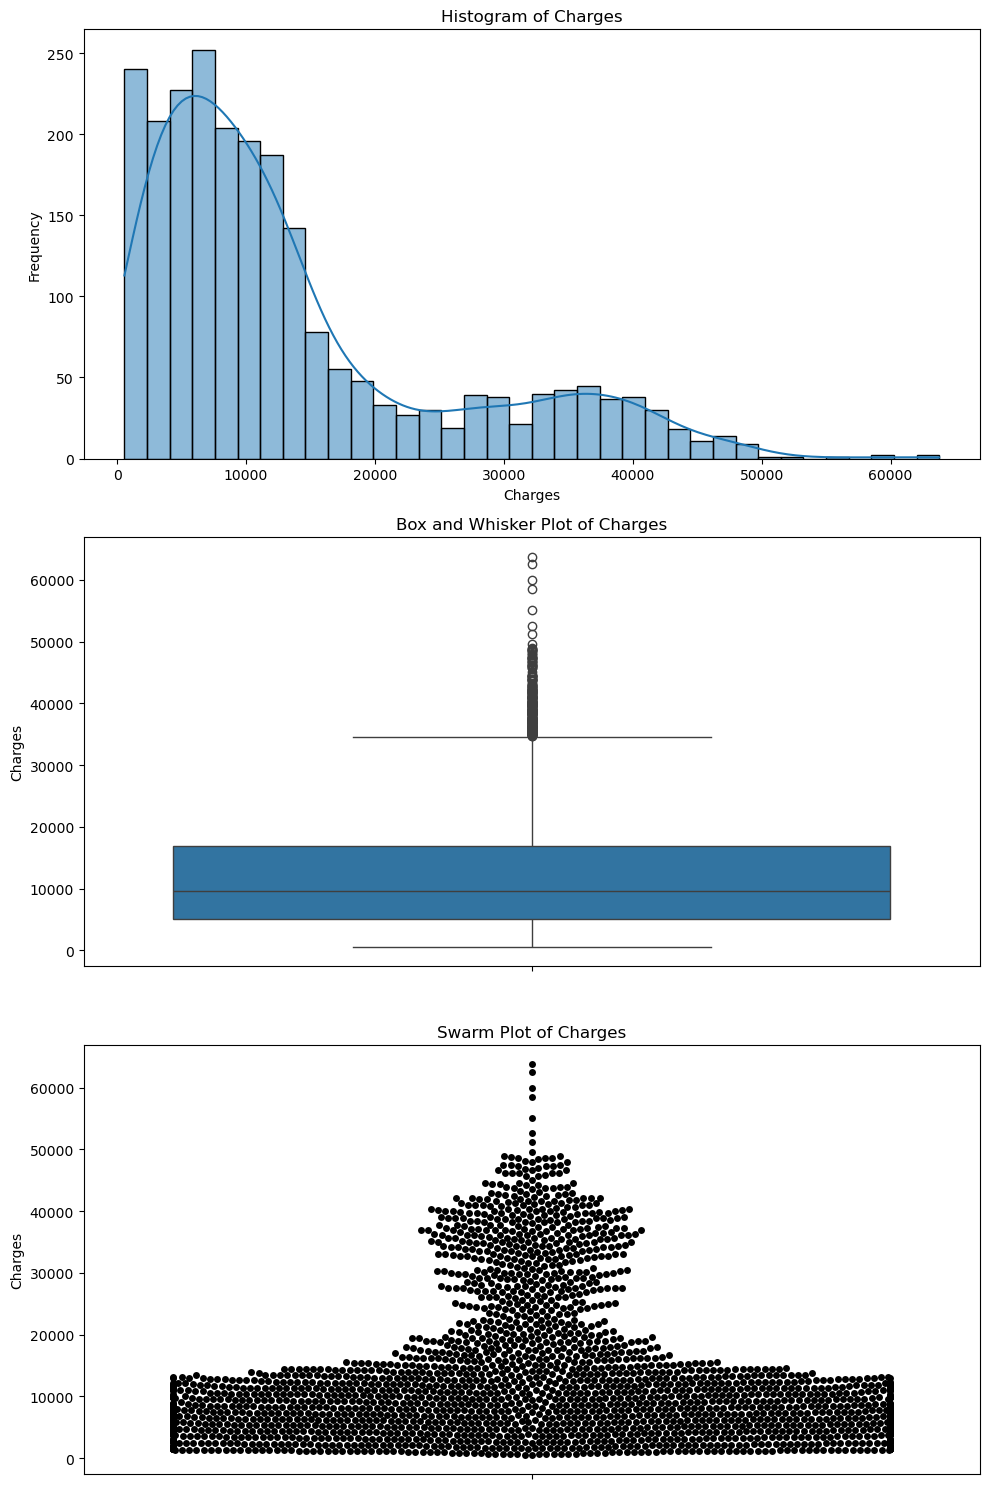

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram
sns.histplot(df6['charges'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Charges')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Box and whisker plot
sns.boxplot(data=df6, y='charges', ax=axes[1])
axes[1].set_title('Box and Whisker Plot of Charges')
axes[1].set_ylabel('Charges')

# Swarm plot
sns.swarmplot(data=df6, y='charges', color='black', ax=axes[2])
axes[2].set_title('Swarm Plot of Charges')
axes[2].set_ylabel('Charges')

plt.tight_layout()
plt.show()

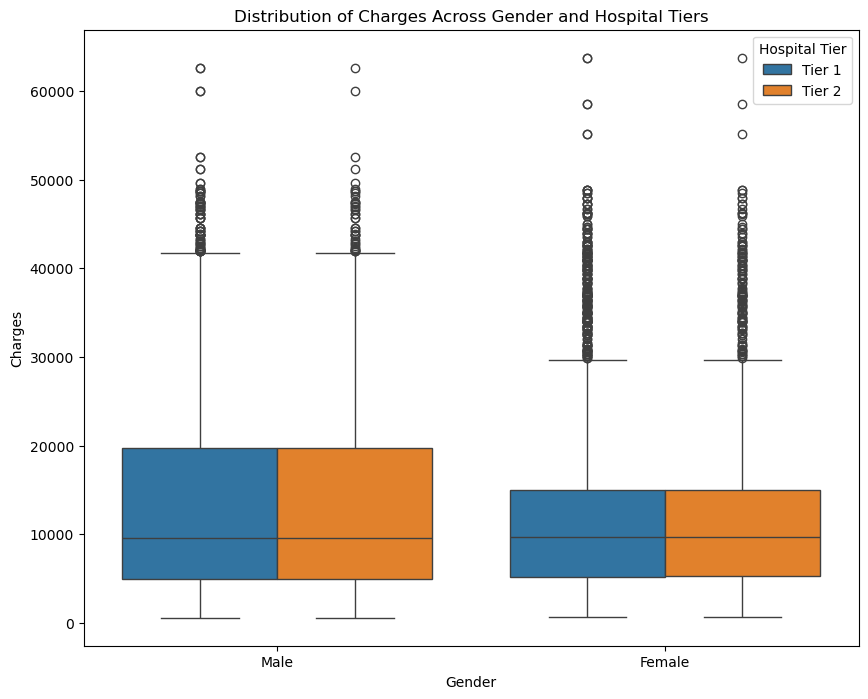

In [57]:
import matplotlib.pyplot as plt

# Melt DataFrame to make it suitable for plotting
df6_melted = df6.melt(id_vars=['charges', 'Gender'],
                      value_vars=['Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3'],
                      var_name='Hospital Tier', value_name='Hospital')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Box plot of charges across gender and hospital tiers
sns.boxplot(data=df6_melted, x='Gender', y='charges', hue='Hospital', ax=ax)
ax.set_title('Distribution of Charges Across Gender and Hospital Tiers')
ax.set_xlabel('Gender')
ax.set_ylabel('Charges')
ax.set_xticklabels(['Male', 'Female'])  # Rename x-axis labels

# Rename legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Tier 1', 'Tier 2', 'Tier 3'], title='Hospital Tier')

plt.show()

In [59]:
# Save df6 to a CSV file
df6.to_csv("df6.csv")

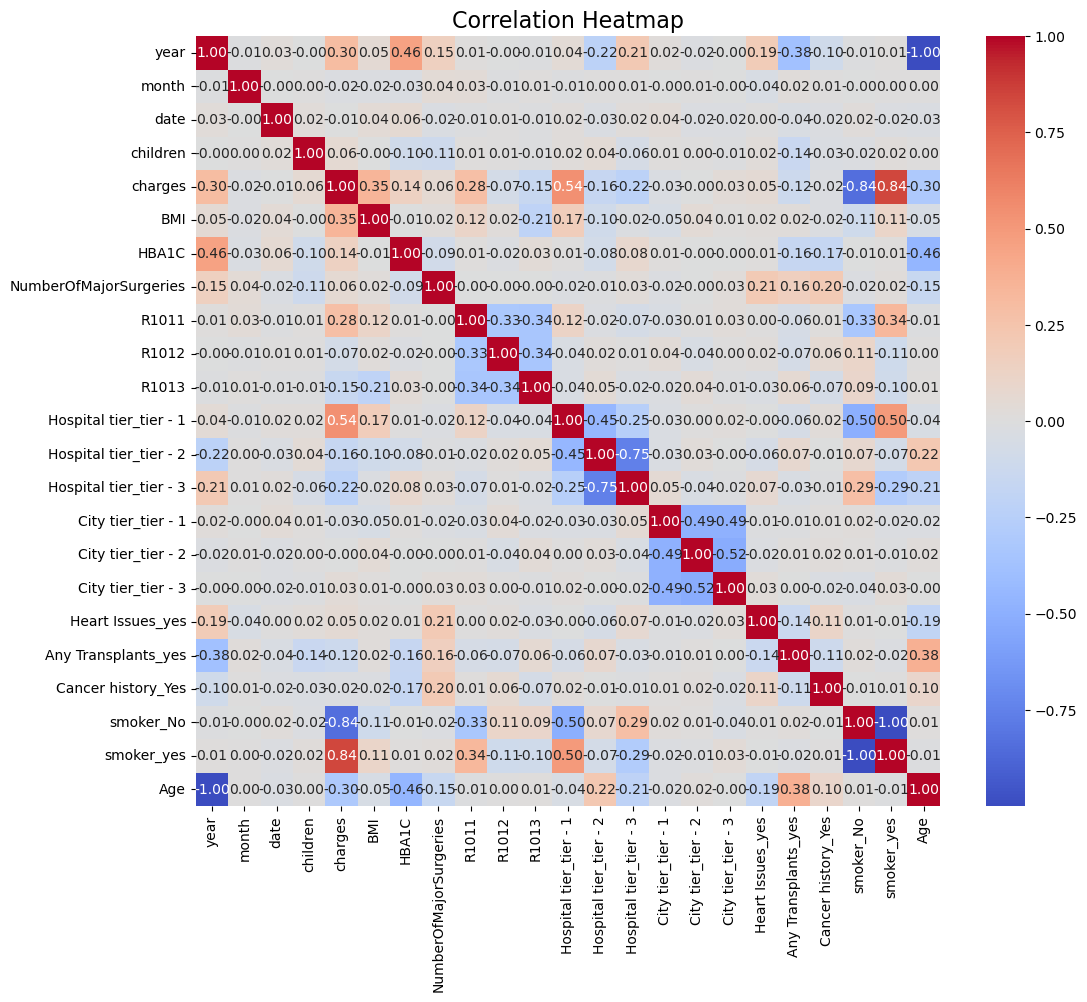

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for the heatmap
columns_for_heatmap = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                       'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                       'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                       'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                       'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                       'smoker_No', 'smoker_yes', 'Age']

# Calculating the correlation matrix
correlation_matrix = df6[columns_for_heatmap].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

# Selecting columns for modeling
selected_columns = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                    'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                    'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                    'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                    'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                    'smoker_No', 'smoker_yes', 'Age']

# Splitting features (X) and target (y)
X = df6[selected_columns].drop(columns='charges')
y = df6['charges']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define regression models
linear_regression = LinearRegression()
ridge_regression = Ridge()

# Define pipelines
linear_pipeline = Pipeline([('scaler', scaler), ('regressor', linear_regression)])
ridge_pipeline = Pipeline([('scaler', scaler), ('regressor', ridge_regression)])

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate models
linear_cv_scores = cross_val_score(linear_pipeline, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_pipeline, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of cross-validation scores
print("Linear Regression CV Scores:")
print("Mean:", -np.mean(linear_cv_scores))
print("Standard Deviation:", np.std(linear_cv_scores))
print("\nRidge Regression CV Scores:")
print("Mean:", -np.mean(ridge_cv_scores))
print("Standard Deviation:", np.std(ridge_cv_scores))


Linear Regression CV Scores:
Mean: 3.054597411292421e+28
Standard Deviation: 6.109194822584842e+28

Ridge Regression CV Scores:
Mean: 19696942.123985164
Standard Deviation: 1054264.1983392895


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Selecting columns for modeling
selected_columns = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                    'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                    'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                    'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                    'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                    'smoker_No', 'smoker_yes', 'Age']

# Splitting features (X) and target (y)
X = df6[selected_columns].drop(columns='charges')
y = df6['charges']

# Standardizing features and model fitting in a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
#rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
#rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Best Hyperparameters: {'regressor__alpha': 10}
Train RMSE: 4437.508433057518
Test RMSE: 4281.103404481637


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Selecting columns for modeling
selected_columns = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                    'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                    'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                    'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                    'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                    'smoker_No', 'smoker_yes', 'Age']

# Splitting features (X) and target (y)
X = df6[selected_columns].drop(columns='charges')
y = df6['charges']

# Standardizing features and model fitting in a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
#rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
#rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Best Hyperparameters: {'regressor__alpha': 10}
Train RMSE: 4437.508433057518
Test RMSE: 4281.103404481637


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Selecting columns for modeling
selected_columns = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                    'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                    'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                    'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                    'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                    'smoker_No', 'smoker_yes', 'Age']

# Splitting features (X) and target (y)
X = df6[selected_columns].drop(columns='charges')
y = df6['charges']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter for regularization strength

# Fit the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
# rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
# rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
# Calculate RMSE manually
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train RMSE: 4436.863175131918
Test RMSE: 4280.174819516402


Feature Importances:
                   Feature  Importance
20               smoker_No    0.429206
19      Cancer history_Yes    0.320139
4                  charges    0.113816
0                     year    0.066218
21              smoker_yes    0.024713
10                   R1013    0.013409
7   NumberOfMajorSurgeries    0.007762
3                 children    0.006263
12  Hospital tier_tier - 2    0.005879
9                    R1012    0.004382
5                      BMI    0.003466
2                     date    0.002012
1                    month    0.001302
14      City tier_tier - 1    0.000877
11  Hospital tier_tier - 1    0.000176
8                    R1011    0.000133
13  Hospital tier_tier - 3    0.000080
6                    HBA1C    0.000071
18     Any Transplants_yes    0.000041
17        Heart Issues_yes    0.000029
15      City tier_tier - 2    0.000014
16      City tier_tier - 3    0.000010


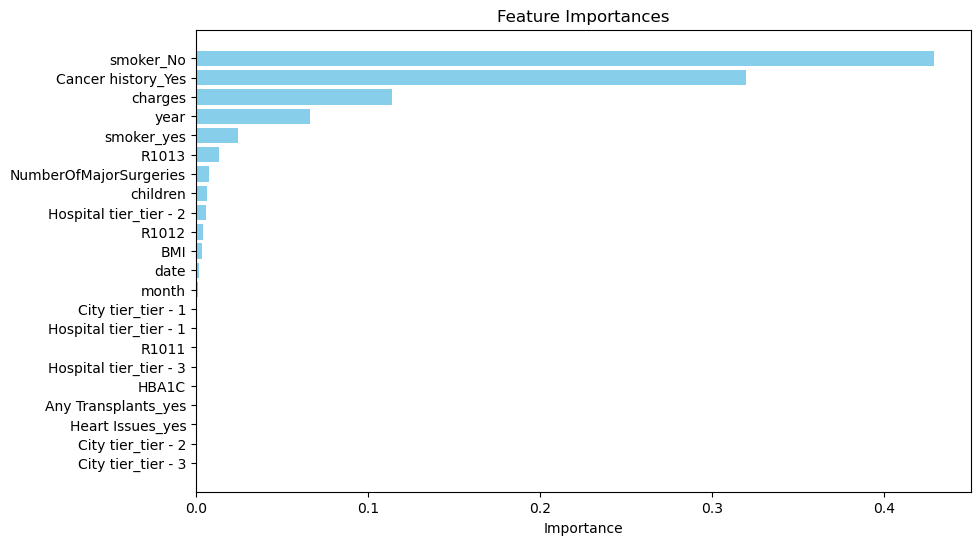

In [95]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting columns for modeling
selected_columns = ['year', 'month', 'date', 'children', 'charges', 'BMI',
                    'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                    'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                    'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                    'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
                    'smoker_No', 'smoker_yes', 'Age']

# Splitting features (X) and target (y)
X = df6[selected_columns].drop(columns='charges')
y = df6['charges']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_columns[:-1], 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [97]:
# Prepare Ms. Jayna's data for prediction
import numpy as np

# Ms. Jayna's details
ms_jayna_data = {
    'year': 2025,  # Assuming the current year
    'month': 3,    # Assuming current month (March)
    'date': 18,    # Assuming today's date
    'children': 2,
    'charges': 0,  # Placeholder for prediction
    'BMI': 85 / ((170 / 100) ** 2),  # BMI calculation
    'HBA1C': 5.8,
    'NumberOfMajorSurgeries': 0,
    'R1011': 1,
    'R1012': 0,
    'R1013': 0,
    'Hospital tier_tier - 1': 1,
    'Hospital tier_tier - 2': 0,
    'Hospital tier_tier - 3': 0,
    'City tier_tier - 1': 1,
    'City tier_tier - 2': 0,
    'City tier_tier - 3': 0,
    'Heart Issues_yes': 0,
    'Any Transplants_yes': 0,
    'Cancer history_Yes': 1,  # Family history of cancer
    'smoker_No': 0,
    'smoker_yes': 1,
    'Age': 2025 - 1988  # Age calculation
}

# Ensure the input matches the training feature order
ms_jayna_input = np.array([ms_jayna_data[col] for col in selected_columns if col != 'charges']).reshape(1, -1)

# Scale the input using the fitted scaler
ms_jayna_input_scaled = scaler.transform(ms_jayna_input)

# Predict hospitalization cost
predicted_cost = ridge_model.predict(ms_jayna_input_scaled)

print("Estimated Hospitalization Cost for Ms. Jayna:", round(predicted_cost[0], 2))

Estimated Hospitalization Cost for Ms. Jayna: 38966.47
